Álvaro Sáenz-Torre, Alejandra Reinares, Luis Domene and Joan Bayona

In [1]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
f=open("training.json")
training_set=json.load(f)

l_training=[]
for i in range(len(training_set)):
    l_training.append({"text":training_set[i]["data"]["text"], "results":training_set[i]["predictions"][0]["result"]})

In [3]:
l_neg=[]
l_unc=[]
l_nsco=[]
l_usco=[]
for dic in l_training:
    for dic2 in dic["results"]:
        if(dic2["value"]["labels"][0]=="NEG"):
            l_neg.append(dic["text"][dic2["value"]["start"]:dic2["value"]["end"]])
        
        elif(dic2["value"]["labels"][0]=="UNC"):
            l_unc.append(dic["text"][dic2["value"]["start"]:dic2["value"]["end"]])
        
        elif(dic2["value"]["labels"][0]=="NSCO"):
            l_nsco.append(dic["text"][dic2["value"]["start"]:dic2["value"]["end"]])
        
        elif(dic2["value"]["labels"][0]=="USCO"):
            l_usco.append(dic["text"][dic2["value"]["start"]:dic2["value"]["end"]])

In [4]:
for i in range(len(l_neg)):
    if(not l_neg[i][0].isalpha()):
        l_neg[i]=l_neg[i][1:]
    if(not l_neg[i][-1].isalpha()):
        l_neg[i]=l_neg[i][:-1]

for i in range(len(l_unc)):
    if(not l_unc[i][0].isalpha()):
        l_unc[i]=l_unc[i][1:]
    if(not l_unc[i][-1].isalpha()):
        l_unc[i]=l_unc[i][:-1]

for i in range(len(l_nsco)):
    if(not l_nsco[i][0].isalpha()):
        l_nsco[i]=l_nsco[i][1:]
    if(not l_nsco[i][-1].isalpha()):
        l_nsco[i]=l_nsco[i][:-1]

for i in range(len(l_usco)):
    if(not l_usco[i][0].isalpha()):
        l_usco[i]=l_usco[i][1:]
    if(not l_usco[i][-1].isalpha()):
        l_usco[i]=l_usco[i][:-1]

In [5]:
print(l_neg[2])
print(l_nsco[2])
print(l_unc) 
print(l_usco) 

sin
para lesiones malignas
['sin claras', 'falsa', 'aparente', 'sugestivos con', 'podria', 'podria', 'dudosa', 'posible', 'dudosa', 'probable', 'compatible con', 'compatible con', 'compatibles con', 'sospecha de', 'sugestiva de', 'probables', 'compatibles con', 'probable', 'dudoso', 'probable', 'probable', 'sospecha de', 'probable', 'posible', 'aparentemente', 'probable', 'impresiona de', 'sugiere', 'probablemente', 'plantea', 'compatible con', 'compatible con', 'probables', 'probable', 'dudosa', 'sugestiva de', 'impresiona', 'impresiona', 'compatibles con', 'aparentemente', 'probable', 'dudoso', 'parece', 'parece', 'aparentemente', 'aparentemente', 'sugestivo de', 'dudosa', 'sospecha de', 'desconoce', 'probablemente', 'compatibles con', 'se orienta', 'se orienta', 'valorar', 'sugestivas de', 'probable', 'compatible con', 'compatible con', 'compatible con', 'sugestivos de', 'sugieren', 'compatible con', 'sin', 'compatibles con', 'probable', 'aparente', 'compatible con', 'compatible con

In [6]:
print(len(l_neg)) #Negation cues
print(len(l_nsco)) #Negation scopes
print(len(l_unc)) #Unc cue
print(len(l_usco)) #Unc scope

4307
4103
458
451


In [20]:
print(list(set(l_neg))) #Different negation cues
print(len(list(set(l_neg)))) #Different unc cues

['desorientacion', 'se desestimo', 'sin', 'negatividad de', 'rechaza', 'descarta', 'impide', 'arritmicos', 'negativas', 'desorientado', 'desaparecen', 'indetectable', 'negatiu', 'neg', 'cede', 'retiro', 'descartada', 'ex fumador', 'niega', 'no', 'tampoco', 'asintomatico', 'inestabilidad', 'incapacidad para', 'ex', 'retirar', 'imposibilidad de', 'negaitvo', 'ausencia de', 'negatividad', 'excepto', 'negativos', 'negativa', 'en ninguna', 'atipicos', 'negatividad del', 'falta de', 'se retira', 'inespecificos', 'ausencia', 'nega', 'suspendido', 'irregulares', 'se suspende', 'ninguno', 'sense', 'niegan', 'exfumador', 'imposibilidad', 'desaparicion del', 'ceden', 'afebril', 'negativo', 'inespecifico', 'asintomatica', 'desaparicion de']
56


Text(0, 0.5, 'Frequency')

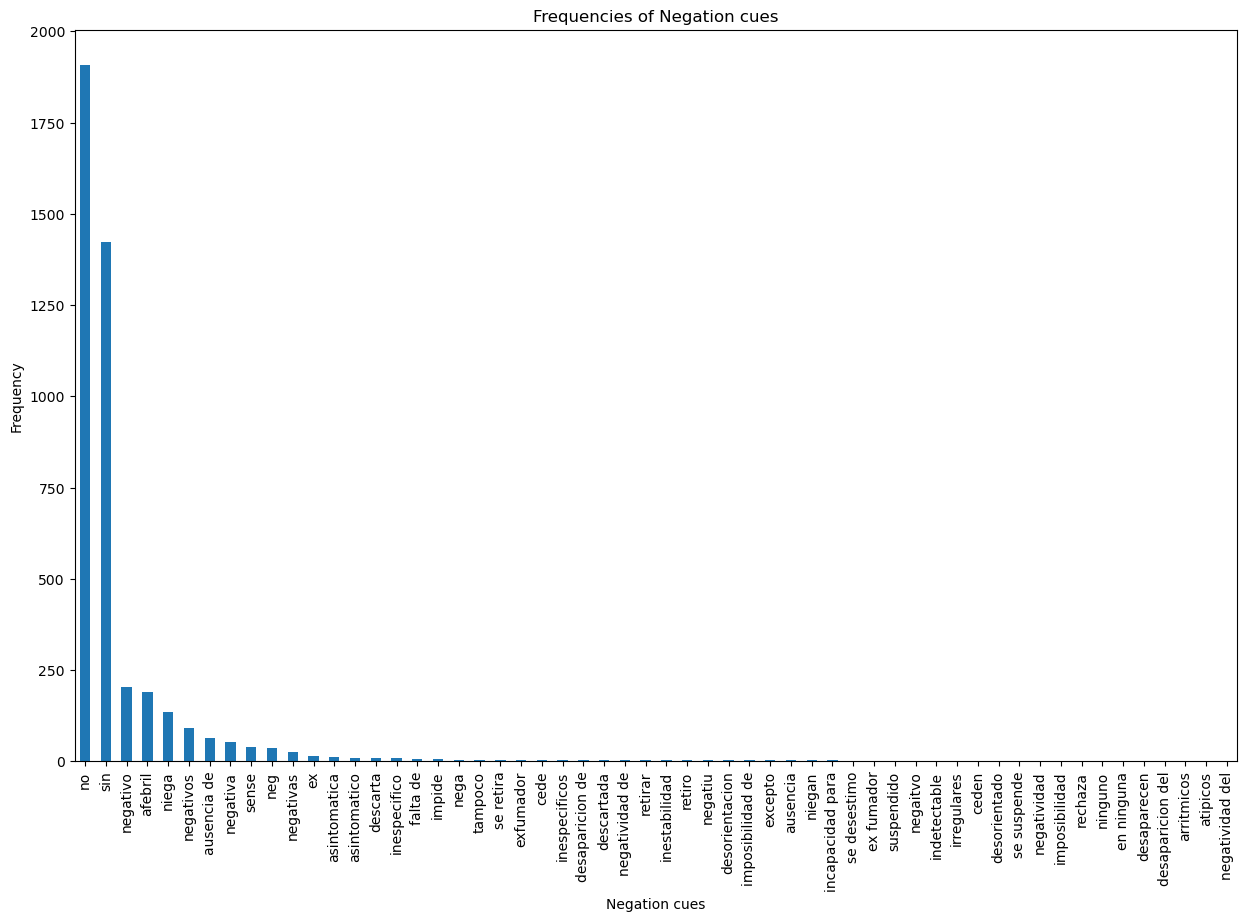

In [51]:
"""l_neg=sorted(l_neg, key=Counter(l_neg).get, reverse=True)
counts=Counter(l_neg)
df=pd.DataFrame.from_dict(counts, orient="index")
df.plot(kind='bar',figsize=(15,5))"""

# Assuming l_neg is already defined
l_neg = sorted(l_neg, key=Counter(l_neg).get, reverse=True)
counts = Counter(l_neg)
df = pd.DataFrame.from_dict(counts, orient="index")

# Plotting the data
ax = df.plot(kind='bar', figsize=(15, 9.5), legend = False)

# Adding labels to the plot
ax.set_title('Frequencies of Negation cues')
ax.set_xlabel('Negation cues')
ax.set_ylabel('Frequency')

In [9]:
c=0
for neg in l_neg:
    if(neg=="no"):
        c+=1
print("Lo que representa el no respecto a todas las negaciones: ",c/len(l_neg))

Lo que representa el no respecto a todas las negaciones:  0.4432319479916415


In [10]:
c=0
for neg in l_neg:
    if(neg=="no" or neg=="sin"):
        c+=1
print("Lo que representa el no y el sin respecto a todas las negaciones: ", c/len(l_neg))

Lo que representa el no y el sin respecto a todas las negaciones:  0.7738565126538194


Text(0, 0.5, 'Frequency')

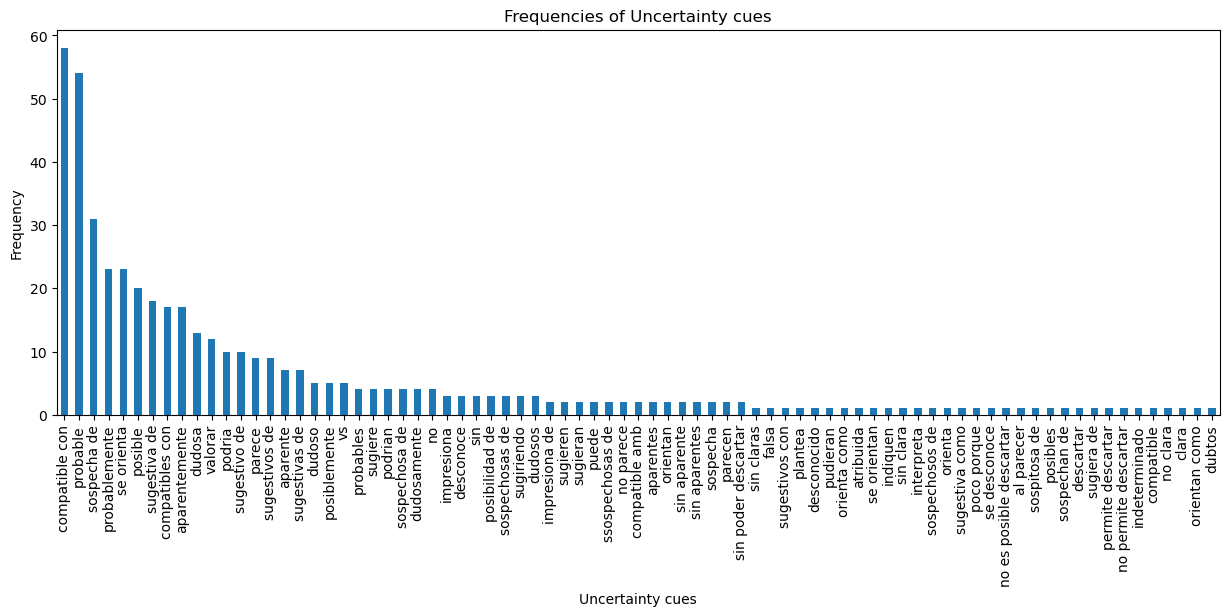

In [40]:
l_unc=sorted(l_unc, key=Counter(l_unc).get, reverse=True)
counts=Counter(l_unc)
df=pd.DataFrame.from_dict(counts, orient='index')
#df.plot(kind='bar',figsize=(15,5))

# Plotting the data
ax = df.plot(kind='bar', figsize=(15, 5), legend = False)

# Adding labels to the plot
ax.set_title('Frequencies of Uncertainty cues')
ax.set_xlabel('Uncertainty cues')
ax.set_ylabel('Frequency')

In [12]:
c=0
for unc in l_unc:
    if(unc=="compatible con"):
        c+=1
print(c)

58


In [13]:
c=0
for unc in l_unc:
    if(unc=="probable"):
        c+=1
print(c)

54


In [14]:
# 2. Histograms of Cue Length
neg_cue_lengths = [len(cue.split()) for cue in l_neg]
unc_cue_lengths = [len(cue.split()) for cue in l_unc]

# 3. Scope Length Distribution
neg_scope_lengths = [len(scope.split()) for scope in l_nsco]
unc_scope_lengths = [len(scope.split()) for scope in l_usco]

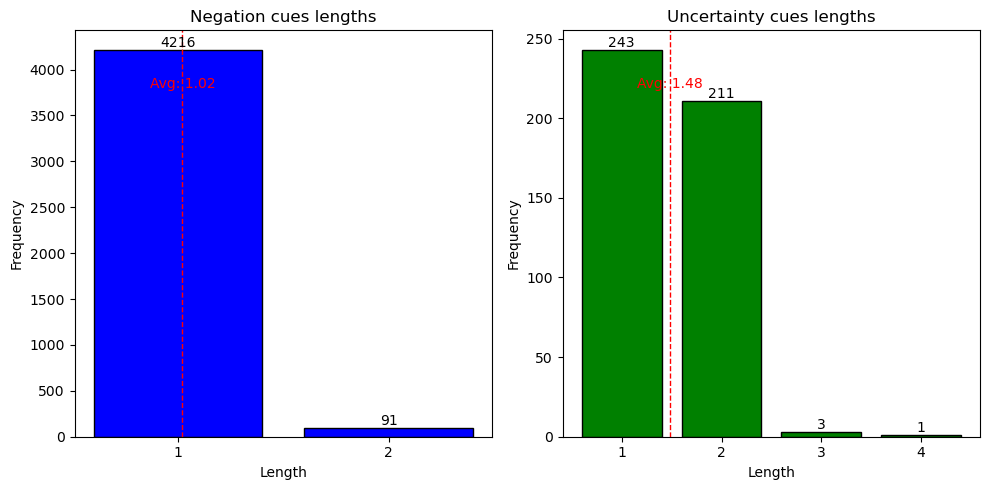

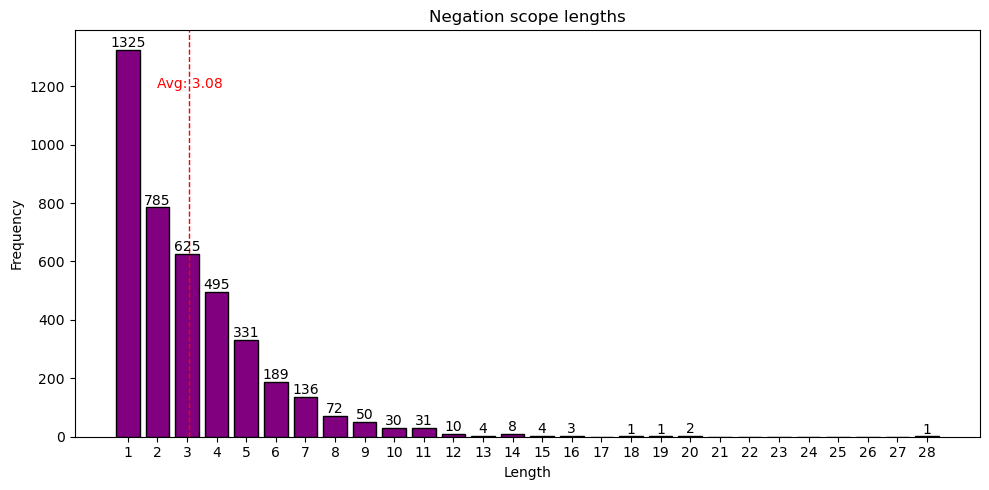

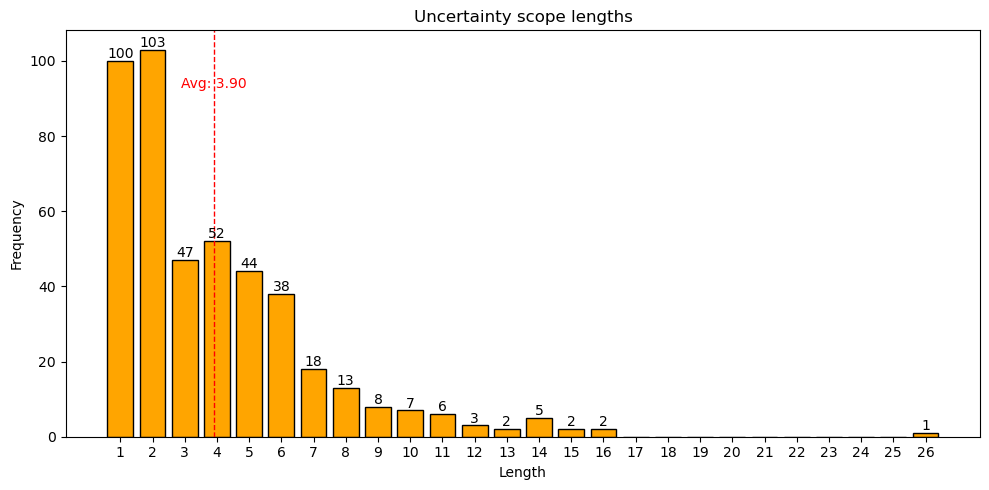

In [52]:
# Function to add frequency labels on the bars with padding
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='top', xytext=(0, 10), textcoords='offset points')

# Plot Negation Cue Lengths
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)

counts, bins, patches = ax.hist(neg_cue_lengths, bins=[0.5, 1.5, 2.5], color='blue', edgecolor='black', align='mid', rwidth=0.8)
ax.set_title('Negation cues lengths')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_xticks([1, 2])
add_labels(ax)
# Adding average line
average_length = sum(neg_cue_lengths) / len(neg_cue_lengths)
ax.axvline(average_length, color='red', linestyle='dashed', linewidth=1)
ax.text(average_length, max(counts) * 0.9, f'Avg: {average_length:.2f}', color = 'red', ha = 'center')


# Plot Uncertainty Cue Lengths
ax = plt.subplot(1, 2, 2)
counts, bins, patches = ax.hist(unc_cue_lengths, bins=[0.5, 1.5, 2.5, 3.5, 4.5], color='green', edgecolor='black', align='mid', rwidth=0.8)
ax.set_title('Uncertainty cues lengths')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_xticks([1, 2, 3, 4])
add_labels(ax)
# Adding average line
average_length = sum(unc_cue_lengths) / len(unc_cue_lengths)
ax.axvline(average_length, color='red', linestyle='dashed', linewidth=1)
ax.text(average_length, max(counts) * 0.9, f'Avg: {average_length:.2f}', color = 'red', ha = 'center')

plt.tight_layout()
plt.show()

# Plot Negation Scope Lengths with average line
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
counts, bins, patches = ax.hist(neg_scope_lengths, bins=range(1, max(neg_scope_lengths) + 2), color='purple', edgecolor='black', align='left', rwidth=0.8)
ax.set_title('Negation scope lengths')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_xticks(range(1, max(neg_scope_lengths) + 1))
add_labels(ax)
# Adding average line
average_length = sum(neg_scope_lengths) / len(neg_scope_lengths)
ax.axvline(average_length, color='red', linestyle='dashed', linewidth=1)
ax.text(average_length, max(counts) * 0.9, f'Avg: {average_length:.2f}', color = 'red', ha = 'center')

plt.tight_layout()
plt.show()

# Plot Uncertainty Scope Lengths with average line
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
counts, bins, patches = ax.hist(unc_scope_lengths, bins=range(1, max(unc_scope_lengths) + 2), color='orange', edgecolor='black', align='left', rwidth=0.8)
ax.set_title('Uncertainty scope lengths')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_xticks(range(1, max(unc_scope_lengths) + 1))
add_labels(ax)
# Adding average line
average_length = sum(unc_scope_lengths) / len(unc_scope_lengths)
ax.axvline(average_length, color='red', linestyle='dashed', linewidth=1)
ax.text(average_length, max(counts) * 0.9, f'Avg: {average_length:.2f}', color = 'red', ha = 'center')

plt.tight_layout()
plt.show()